# Name : Diksha Pardeshi
## USC ID : 7961073499
## GitHub username : dikshapardeshi

## (a) Download the Combined Cycle Power Plant data1 from


In [1]:
!pip install pandas openpyxl
import os

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
!pip install statsmodels
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.metrics import pairwise
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.preprocessing import PolynomialFeatures




In [3]:
df = pd.read_excel("../data/Folds5x2_pp.xlsx")


In [4]:
df.head(5)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## (b) Exploring the data:
i. How many rows are in this data set? How many columns? What do the rows
and columns represent?

In [5]:
df.shape

(9568, 5)

There are 9568 rows and 5 columns in the dataset. 

Each row represent a single data point for the respective columns which was collected over 6 years

The columns here represent five features which are the hourly average ambient variables Temperature (T), Exhaust Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH) and the net hourly electrical energy output (PE)  of the plant

ii. Make pairwise scatterplots of all the variables in the data set including the
predictors (independent variables) with the dependent variable. Describe
your findings.

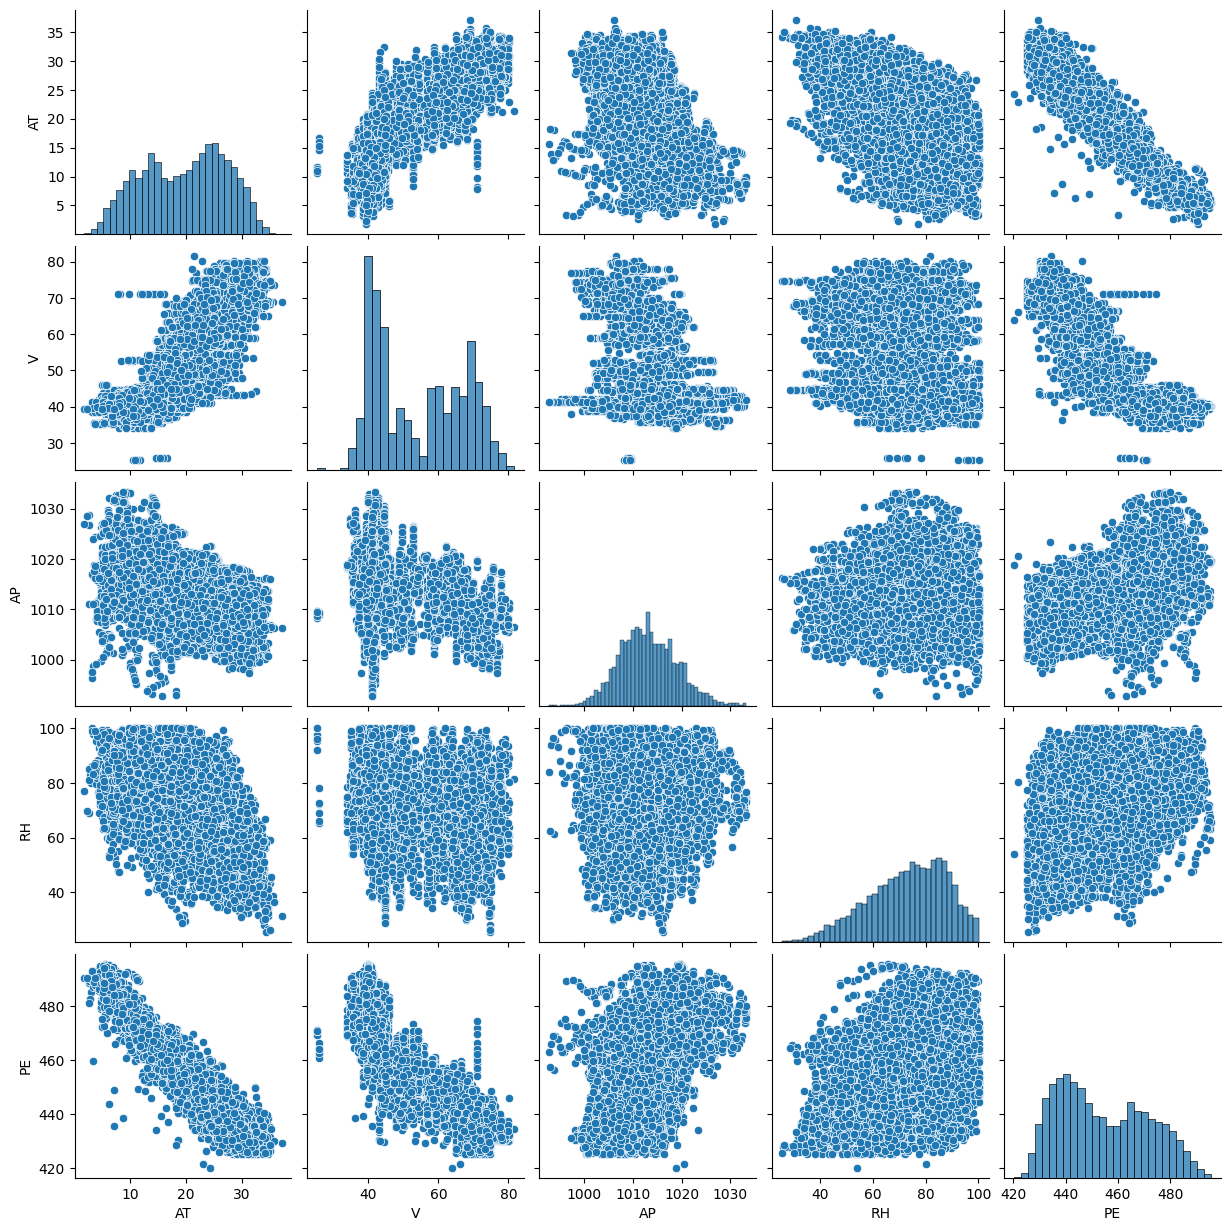

In [6]:
sns.pairplot(df)
plt.show()

## Observations : 

Ambient Temperature (AT) has a positive linear assocation with the Exhaust Vacumm (V) with weak correlation, it has a weak correalation and a negative linear association with AP, weak corrleation wtih RH, and a negative linear association with PE

Exhaust Vacumm (V) has a postive linear correlation with AT, weak negative linear correlation wtih AP, weak correlation wtih RH and negative linear assocition wit PE

AP has a weak non-linear correlation with AT, weak negative linear association with V, almost no correlation with RH and non-linear positive correlation wtih PE

RH has weak correlation with all four variables(AT,V,AP and PE)


PE has strong negative linear correlation wtih AT and V, weak correlation with AP and RH


iii. What are the mean, the median, range, first and third quartiles, and in-
terquartile ranges of each of the variables in the dataset? Summarize them
in a table.

In [7]:
columns = ['AT','V','AP','RH','PE']
results=[]
for cols in columns:
    mean=df[cols].mean()
    median=df[cols].median()
    q1=df[cols].quantile(0.25)
    q3=df[cols].quantile(0.75)
    range=df[cols].max()-df[cols].min()
    iqr = q3-q1
    results.append([mean,median,q1,q3,range,iqr])

results_df = pd.DataFrame(results,columns=['Mean','Median','Q1','Q3','Range','IQR'],index=columns)
print(results_df.T)
    
     

               AT          V           AP         RH          PE
Mean    19.651231  54.305804  1013.259078  73.308978  454.365009
Median  20.345000  52.080000  1012.940000  74.975000  451.550000
Q1      13.510000  41.740000  1009.100000  63.327500  439.750000
Q3      25.720000  66.540000  1017.260000  84.830000  468.430000
Range   35.300000  56.200000    40.410000  74.600000   75.500000
IQR     12.210000  24.800000     8.160000  21.502500   28.680000


(c) For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically signicant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?

In [8]:
linear_coeff = []
def fit_plot_summary(independent):

    dependent = 'PE'
    y = df['PE']
    x = df[independent]
    # adding an intercept beta naught
    b = sm.add_constant(x, prepend=False)
    model = sm.OLS(y, b).fit()
    print(f"Model Summary for {independent}")
    print(model.summary())

    
    influence = OLSInfluence(model)
    cooks_distance = influence.cooks_distance[0]
    n = len(x)
    threshold = 4 / n
    outliers = np.where(cooks_distance > threshold)[0]
    print(f"Number of outliers: ",len(outliers))

    plt.figure(figsize=(10, 6))
    
    
    sns.scatterplot(x=x[~np.isin(np.arange(len(x)), outliers)], 
                    y=y[~np.isin(np.arange(len(y)), outliers)],
                    label='Non-outliers')
    
    ## creating a filter to get a new dataframe without any of the identified outliers
    ## ChatGPT prompt : How to filter out a certain section of the dataframe
    filter = ~np.isin(np.arange(len(x)), outliers)
    cleaned_df = df[filter].copy()
    
    plt.scatter(x[outliers], y[outliers], color='red', label='Outliers')
    plt.plot(x, model.predict(b), color='black', label='Regression Line')

    linear_coeff.append(model.params[0])

    plt.title(f"Simple Linear Regression for {independent}")
    plt.xlabel(f"{independent}")
    plt.ylabel(f"{dependent}")
    plt.legend()
    plt.show()
    print('=======================================================================================')

    print(f"Model Summary for {independent} after removing outliers")
    print('=======================================================================================')
    dependent = 'PE'
    y1 = cleaned_df['PE']
    x1 = cleaned_df[independent]
    # adding an intercept beta naught
    b1 = sm.add_constant(x1, prepend=False)
    model = sm.OLS(y1, b1).fit()
    print(f"Model Summary for {independent}")
    print(model.summary())

    
    

Model Summary for AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:12:19   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -2.1713      0.00

/var/folders/qv/d4khr3997qn7z0cv4y4lwtk80000gn/T/ipykernel_89292/2614187905.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linear_coeff.append(model.params[0])


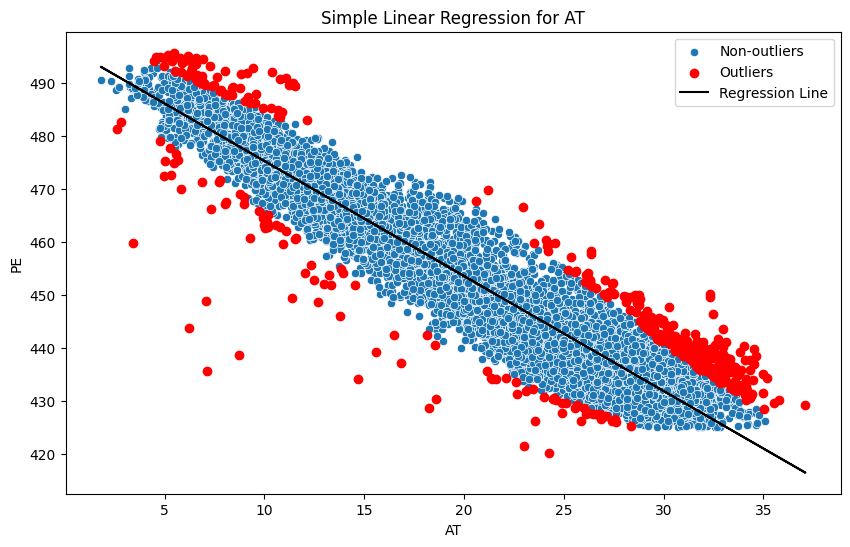

Model Summary for AT after removing outliers
Model Summary for AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.047e+05
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:12:19   Log-Likelihood:                -27302.
No. Observations:                9152   AIC:                         5.461e+04
Df Residuals:                    9150   BIC:                         5.462e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [9]:
fit_plot_summary('AT')


## Results for AT : 
1. The p-value for AT is less than 0.005 which means that it is a good predictor of PE.
2. There are 416 outliers in AT
3. The R^2 value increases after removing outlier which means that model can now explain it's variance better

Model Summary for V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:12:19   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V             -1.1681      0.007

/var/folders/qv/d4khr3997qn7z0cv4y4lwtk80000gn/T/ipykernel_89292/2614187905.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linear_coeff.append(model.params[0])


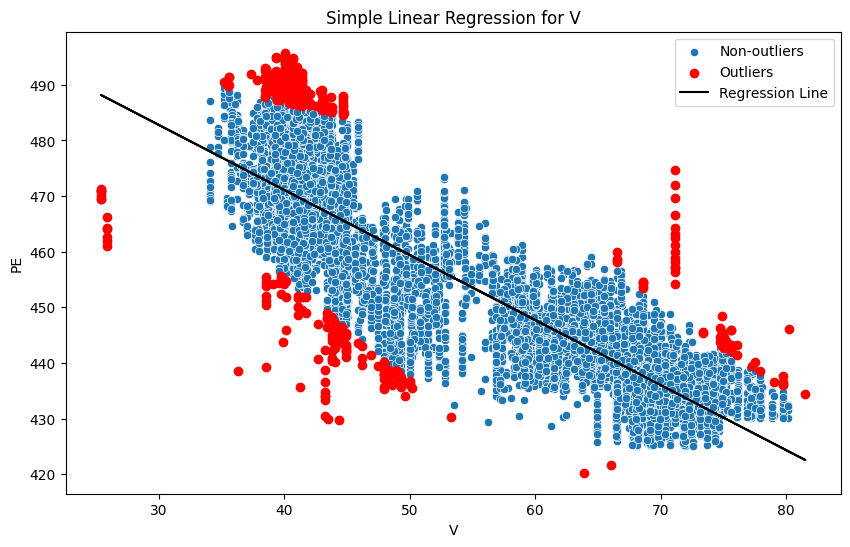

Model Summary for V after removing outliers
Model Summary for V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                 3.612e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:12:19   Log-Likelihood:                -31275.
No. Observations:                9145   AIC:                         6.255e+04
Df Residuals:                    9143   BIC:                         6.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [10]:
fit_plot_summary('V')


## Results for V : 
1. The p-value for V is less than 0.005 which means that it is a good predictor of PE.
2. There are 423 outliers in V
3. The R^2 value increases after removing outliers which means that model can now explain it's variance better

Model Summary for AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:12:19   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AP             1.4899      0.02

/var/folders/qv/d4khr3997qn7z0cv4y4lwtk80000gn/T/ipykernel_89292/2614187905.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linear_coeff.append(model.params[0])


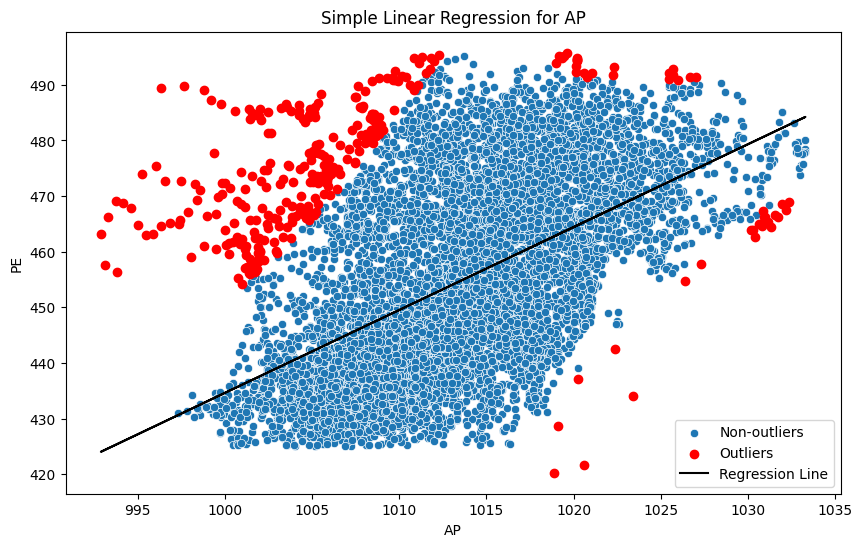

Model Summary for AP after removing outliers
Model Summary for AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     5234.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:12:19   Log-Likelihood:                -37219.
No. Observations:                9268   AIC:                         7.444e+04
Df Residuals:                    9266   BIC:                         7.446e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [11]:
fit_plot_summary('AP')


## Results for AP : 
1. The p-value for AP is less than 0.005 which means that it is a good predictor of PE.
2. There are 300 outliers in AP
3. The R^2 value increases after removing outlier which means that model can now explain it's variance better

Model Summary for RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:12:19   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RH             0.4557      0.01

/var/folders/qv/d4khr3997qn7z0cv4y4lwtk80000gn/T/ipykernel_89292/2614187905.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linear_coeff.append(model.params[0])


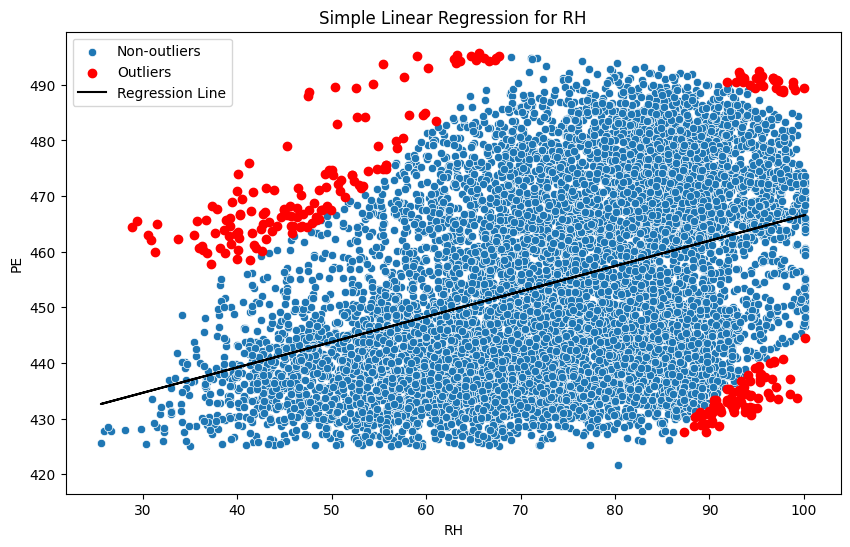

Model Summary for RH after removing outliers
Model Summary for RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     2277.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:12:19   Log-Likelihood:                -38536.
No. Observations:                9319   AIC:                         7.708e+04
Df Residuals:                    9317   BIC:                         7.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [12]:
fit_plot_summary('RH')


## Results for RH : 
1. The p-value for RH is less than 0.005 which means that it is a good predictor of PE.
2. There are 249 outliers in RH
3. The R^2 value increaseS after removing outlier which means that model can now explain it's variance better


## (d) Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis
H0 : βj= 0?

In [13]:
y = df['PE']
x = df[['AT','V','AP','RH']]
b = sm.add_constant(x, prepend=False)
model = sm.OLS(y, b).fit()
print(model.summary())
multi_coeff=[]
multi_coeff.append(model.params[0:4])


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:12:19   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9775      0.015   -129.342      0.0

## Results : 

1. All the independent variables have a p-value of 0.00 which makes all of them statistically significant and so we can reject null hypothesis(H0 : βj= 0) for all the independent variables

2. The R^2 value is also greater than any of the individual independent values, which means that all the predictors together can better explain the variance of the dataset

## (e) How do your results from 1c compare to your results from 1d? Create a plot
displaying the univariate regression coe cients from 1c on the x-axis, and the
multiple regression coe cients from 1d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coe cient in a simple linear regression
model is shown on the x-axis, and its coe cient estimate in the multiple linear
regression model is shown on the y-axis.

In [14]:
print(linear_coeff)
print()
print(multi_coeff)
datat = pd.DataFrame()
print(type(multi_coeff))
multivariate_coefs = multi_coeff[0]


[np.float64(-2.171319958517787), np.float64(-1.1681351265557052), np.float64(1.4898716733991082), np.float64(0.4556501022629776)]

[AT   -1.977513
V    -0.233916
AP    0.062083
RH   -0.158054
dtype: float64]
<class 'list'>


In [15]:
data_ = pd.DataFrame({
    'predictor': columns[0:4],
    'univariate': linear_coeff,
    'multivariate': multivariate_coefs
})
data_

,predictor,univariate,multivariate
AT,AT,-2.171320,-1.977513
V,V,-1.168135,-0.233916
AP,AP,1.489872,0.062083
RH,RH,0.455650,-0.158054


<Axes: xlabel='univariate', ylabel='multivariate'>

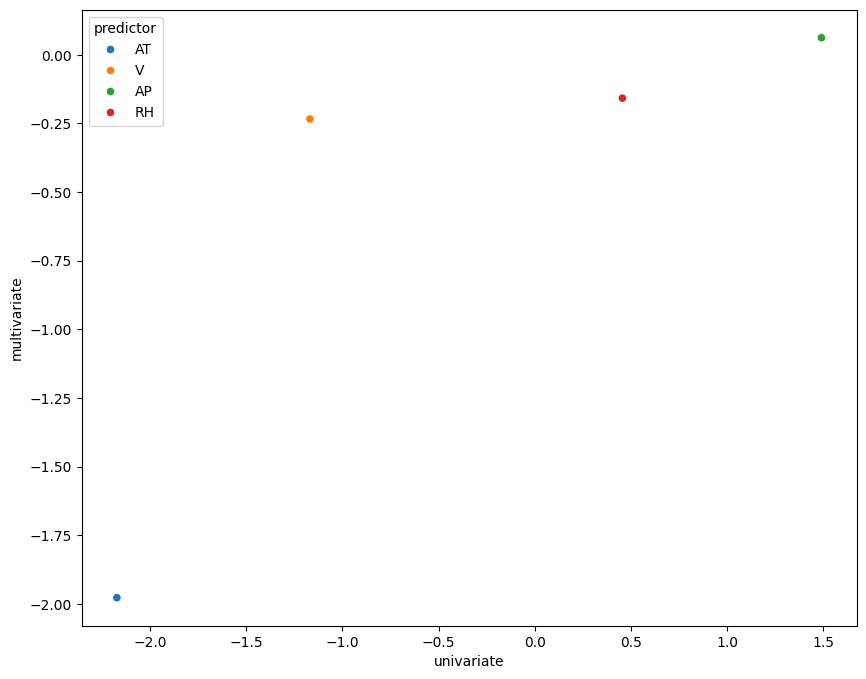

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data_, x='univariate', y='multivariate',hue='predictor')


## (f) Is there evidence of nonlinear association between any of the predictors and the
response?

In [17]:
def nonlinear_association(independent):
    
    y=df['PE']
    x=pd.DataFrame(df[independent])
    poly = PolynomialFeatures(degree=3, include_bias=False)
    #print(x)
    x_poly = poly.fit_transform(x)
    x_poly = sm.add_constant(x_poly)  
    model = sm.OLS(y, x_poly).fit()
    print(model.summary())


In [18]:
nonlinear_association('AT')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:12:19   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

## Results : 

Since the p-value for AT is below 0.005, we can say that there is nonlinear relation between AT and PE

In [19]:
nonlinear_association('V')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:12:19   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

## Results : 

Since the p-value for V is below 0.005, we can say that there is nonlinear relation between V and PE

In [20]:
nonlinear_association('AP')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:12:19   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

## Results : 

Since the p-value for AP is below 0.005, we can say that there is nonlinear relation between AP and PE

In [21]:
nonlinear_association('RH')

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:12:19   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

## Results : 

Since the p-value for RH is below 0.005, we can say that there is nonlinear relation between RH and PE

## (g) Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically signicant.

In [22]:
## chatgpt prompt : How to generate pairwise interaction terms between all predictors in my dataset?
import itertools
predictors = ['AT', 'V', 'AP', 'RH']
response = 'PE'
for pair in itertools.combinations(predictors, 2):
    df[f'{pair[0]}_x_{pair[1]}'] = df[pair[0]] * df[pair[1]]

X_inter = df[predictors + [f'{pair[0]}_x_{pair[1]}' for pair in itertools.combinations(predictors, 2)]]
X_inter = sm.add_constant(X_inter) 
y_inter = df[response]       

model = sm.OLS(y_inter, X_inter).fit()

print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:12:19   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

## Results : 

Since the p-value for AT_X_V, AT_RH,V_X_AP, is below 0.005, we can say that these interaction terms are statistically significant.

## (h) Can you improve your model using possible interaction terms or nonlinear asso-
ciations between the predictors and response? Train the regression model on a
randomly selected 70% subset of the data with all predictors. Also, run a regres-
sion model involving all possible interaction terms and quadratic nonlinearities,
and remove insigni cant variables using p-values (be careful about interaction
terms). Test both models on the remaining points and report your train and test
MSEs.


In [23]:


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

b_train = sm.add_constant(X_train)

model_all_preds = sm.OLS(y_train, b_train).fit()

y_train_pred = model_all_preds.predict(b_train)
b_test = sm.add_constant(X_test)  
y_test_pred = model_all_preds.predict(b_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")

mse_df = pd.DataFrame({
    'Parameters': ['Model with all predictors'],
    'MSE Train Error': [mse_train.round(3)],
    'MSE Test Error': [mse_test.round(3)]
})

mse_df


Training MSE: 20.5808
Test MSE: 21.2399


,Parameters,MSE Train Error,MSE Test Error
0,Model with all predictors,20.581,21.24


In [24]:
#chatgpt : how do to add the results to two for in loops

predictors = ['AT', 'V', 'AP', 'RH']
response = 'PE'

df_combined = df.copy()

for pair in itertools.combinations(predictors, 2):
    df_combined[f'{pair[0]}_x_{pair[1]}'] = df_combined[pair[0]] * df_combined[pair[1]]

for predictor in predictors:
    df_combined[f'{predictor}_squared'] = df_combined[predictor] ** 2

X = df_combined[predictors + 
                [f'{pair[0]}_x_{pair[1]}' for pair in itertools.combinations(predictors, 2)] + 
                [f'{predictor}_squared' for predictor in predictors]]

X = sm.add_constant(X)

Y = df_combined[response]

model_combined = sm.OLS(Y, X).fit()

print(model_combined.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.030e+04
Date:                Fri, 27 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:12:19   Log-Likelihood:                -27431.
No. Observations:                9568   AIC:                         5.489e+04
Df Residuals:                    9553   BIC:                         5.500e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7503.7323   1207.276     -6.215      0.0

In [25]:

X_train_, X_test_, y_train_, y_test_ = train_test_split(X, Y, test_size=0.3, random_state=42)
b_train_ = sm.add_constant(X_train_)

model_interaction_quad = sm.OLS(y_train_, b_train_).fit()

y_train_pred_ = model_interaction_quad.predict(b_train_)
b_test_ = sm.add_constant(X_test_)  
y_test_pred_ = model_interaction_quad.predict(b_test_)

mse_train_ = mean_squared_error(y_train_, y_train_pred_)
mse_test_ = mean_squared_error(y_test_, y_test_pred_)

print(f"Training MSE: {mse_train_:.4f}")
print(f"Test MSE: {mse_test_:.4f}")

mse_df_ = pd.DataFrame({
    'Parameters': ['Model with interaction and quad nonlinearities'],
    'MSE Train Error': [mse_train_.round(3)],
    'MSE Test Error': [mse_test_.round(3)]
})

mse_df_


Training MSE: 17.8878
Test MSE: 18.6473


,Parameters,MSE Train Error,MSE Test Error
0,Model with interaction and quad nonlinearities,17.888,18.647


In [26]:
mse_df = pd.DataFrame({
    'Parameters': ['Model with all predictors'],
    'MSE Train Error': [mse_train.round(3)],
    'MSE Test Error': [mse_test.round(3)]
})

mse_df_ = pd.DataFrame({
    'Parameters': ['Model with interaction and quad nonlinearities'],
    'MSE Train Error': [mse_train_.round(3)],
    'MSE Test Error': [mse_test_.round(3)]
})

combined_mse_df = pd.concat([mse_df, mse_df_], ignore_index=True)

combined_mse_df

,Parameters,MSE Train Error,MSE Test Error
0,Model with all predictors,20.581,21.240
1,Model with interaction and quad nonlinearities,17.888,18.647


## Results : 

Upon including all possible interaction terms and quadratic nonlinearities, the following variables are found to be statistically insignificant : 
1. AT
2. V
3. AT_X_AP
4. V_X_AP
5. V_X_RH
6. V^2

We wont be removing AT, V in spite of the fact that their p-value > 0.005 since they are the foundational variables upon which more interaction terms are created, who happen to be stastically significant.

## Removing insignificant variables using p-values

In [27]:
## removing insignificant columns from df_combined
df_combined_dropped = df_combined.copy()
df_combined_dropped=df_combined_dropped.drop(columns=['AT_x_AP','V_x_AP','V_x_RH','V_squared'])
df_combined_dropped

,AT,V,AP,RH,PE,AT_x_V,AT_x_RH,AP_x_RH,AT_squared,AP_squared,RH_squared
0,14.96,41.76,1024.07,73.17,463.26,624.7296,1094.6232,74931.2019,223.8016,1.048719e+06,5353.8489
1,25.18,62.96,1020.04,59.08,444.37,1585.3328,1487.6344,60263.9632,634.0324,1.040482e+06,3490.4464
2,5.11,39.40,1012.16,92.14,488.56,201.3340,470.8354,93260.4224,26.1121,1.024468e+06,8489.7796
3,20.86,57.32,1010.24,76.64,446.48,1195.6952,1598.7104,77424.7936,435.1396,1.020585e+06,5873.6896
4,10.82,37.50,1009.23,96.62,473.90,405.7500,1045.4284,97511.8026,117.0724,1.018545e+06,9335.4244
...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03,827.3385,1515.1500,92274.9100,277.2225,1.028216e+06,8281.0000
9564,13.19,39.18,1023.67,66.78,469.62,516.7842,880.8282,68360.6826,173.9761,1.047900e+06,4459.5684
9565,31.32,74.33,1012.92,36.48,429.57,2328.0156,1142.5536,36951.3216,980.9424,1.026007e+06,1330.7904
9566,24.48,69.45,1013.86,62.39,435.74,1700.1360,1527.3072,63254.7254,599.2704,1.027912e+06,3892.5121


In [28]:
X_1 = df_combined_dropped.drop(columns=['PE'])
Y_1 = df_combined_dropped['PE']


In [29]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, Y_1, test_size=0.3, random_state=42)

b_train_1 = sm.add_constant(X_train_1)

model_interaction_quad_significant = sm.OLS(y_train_1, b_train_1).fit()

y_train_pred_1= model_interaction_quad_significant.predict(b_train_1)
b_test_1 = sm.add_constant(X_test_1)  
y_test_pred_1 = model_interaction_quad_significant.predict(b_test_1)

mse_train_1 = mean_squared_error(y_train_1, y_train_pred_1)
mse_test_1 = mean_squared_error(y_test_1, y_test_pred_1)

print(f"Training MSE: {mse_train_1:.4f}")
print(f"Test MSE: {mse_test_1:.4f}")

mse_df_1 = pd.DataFrame({
    'Parameters': ['Model with interaction and quad nonlinearities that are significant'],
    'MSE Train Error': [mse_train_1.round(3)],
    'MSE Test Error': [mse_test_1.round(3)]
})



combined_mse_df_1 = pd.concat([mse_df, mse_df_,mse_df_1], ignore_index=True)

combined_mse_df_1


Training MSE: 17.9178
Test MSE: 18.6943


,Parameters,MSE Train Error,MSE Test Error
0,Model with all predictors,20.581,21.240
1,Model with interaction and quad nonlinearities,17.888,18.647
2,Model with interaction and quad nonlinearities...,17.918,18.694


In [30]:
y_k = df['PE']
x_k = df[['AT','V','AP','RH']]

x_k


,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [31]:
y_k

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64

## (i) KNN Regression:

## i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k ∈ {1,2,...,100} that gives you the
best fit. Plot the train and test errors in terms of 1/k.

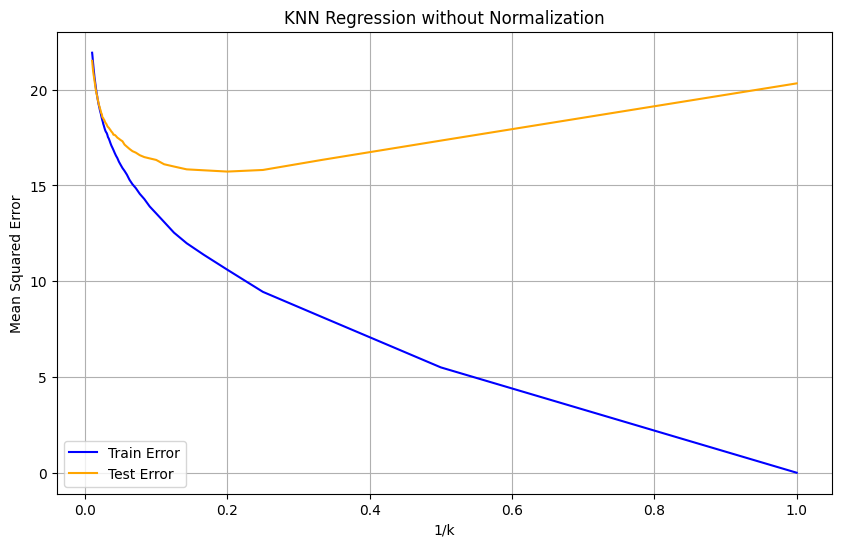

Best k for KNN regression without normalization: 5


In [32]:


X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(x_k, y_k, test_size=0.3, random_state=42)

train_errors_k = []
test_errors_k= []

k_values = np.arange(1, 101, 1)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_k, y_train_k)
    
    y_train_pred_k = knn.predict(X_train_k)
    y_test_pred_k = knn.predict(X_test_k)
    
    
    train_errors_k.append(mean_squared_error(y_train_k, y_train_pred_k))
    test_errors_k.append(mean_squared_error(y_test_k, y_test_pred_k))


plt.figure(figsize=(10, 6))
plt.plot(1/np.array(k_values), train_errors_k, label='Train Error', color='blue')
plt.plot(1/np.array(k_values), test_errors_k, label='Test Error', color='orange')
plt.title('KNN Regression without Normalization')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

best_k = k_values[np.argmin(test_errors_k)]
print(f"Best k for KNN regression without normalization: {best_k}")

min_test_k = (min(test_errors_k))
min_train_k = (min(train_errors_k))

mse_df_k = pd.DataFrame({
    'Parameters': ['KNN model without normalization'],
    'MSE Train Error': [min_train_k.round(3)],
    'MSE Test Error': [min_test_k.round(3)]
})


## K-means with normalization

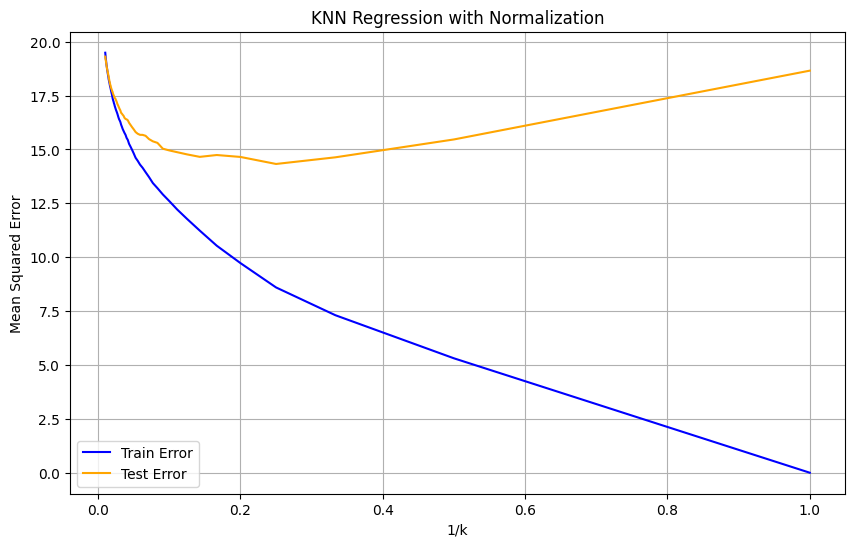

Best k for KNN regression with normalization: 4


In [33]:

scaler = StandardScaler()
X_k = scaler.fit_transform(x_k)

X_train_kn, X_test_kn, y_train_kn, y_test_kn = train_test_split(X_k, y_k, test_size=0.3, random_state=42)

train_errors_kn = []
test_errors_kn = []

k_values_n = np.arange(1, 101, 1)

for k in k_values_n:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_kn, y_train_kn)
    
    y_train_pred_kn = knn.predict(X_train_kn)
    y_test_pred_kn = knn.predict(X_test_kn)
    
    
    train_errors_kn.append(mean_squared_error(y_train_kn, y_train_pred_kn))
    test_errors_kn.append(mean_squared_error(y_test_kn, y_test_pred_kn))

plt.figure(figsize=(10, 6))
plt.plot(1/np.array(k_values_n), train_errors_kn, label='Train Error', color='blue')
plt.plot(1/np.array(k_values_n), test_errors_kn, label='Test Error', color='orange')
plt.title('KNN Regression with Normalization')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

best_train_kn = k_values_n[np.argmin(train_errors_kn)]
best_kn = k_values_n[np.argmin(test_errors_kn)]

print(f"Best k for KNN regression with normalization: {best_kn}")

min_test_kn = (min(test_errors_kn))
min_train_kn = (min(train_errors_kn))

mse_df_kn = pd.DataFrame({
    'Parameters': ['KNN model with normalization'],
    'MSE Train Error': [min_train_kn.round(3)],
    'MSE Test Error': [min_test_kn.round(3)]
})


## (j) Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis.

In [34]:
combined_mse_df_1

,Parameters,MSE Train Error,MSE Test Error
0,Model with all predictors,20.581,21.240
1,Model with interaction and quad nonlinearities,17.888,18.647
2,Model with interaction and quad nonlinearities...,17.918,18.694


In [35]:
combined_mse_df_all = pd.concat([mse_df, mse_df_,mse_df_1,mse_df_k,mse_df_kn], ignore_index=True)
combined_mse_df_all

,Parameters,MSE Train Error,MSE Test Error
0,Model with all predictors,20.581,21.240
1,Model with interaction and quad nonlinearities,17.888,18.647
2,Model with interaction and quad nonlinearities...,17.918,18.694
3,KNN model without normalization,0.000,15.727
4,KNN model with normalization,0.000,14.324


## Results : 

Given the table above, we can see that KNN model with normalization has the smallest mean test error among all models. We can also observe that KNN tends to perform better than all of the regression models for this dataset.

All the analysis performed above has proved that the predictors have nonlinear relations and their interaction were also found to be stastically significant. 

## 2. ISLR: 2.4.1

1. For each of parts (a) through (d), indicate whether we would generally
expect the performance of a flexible statistical learning method to be
better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors
p is small.


Answer: When the sample size is large, and the number of predictors is small, flexible learning methods tend to perform better than inflexible learning methods. This is due to the fact that flexible models can use the large amount of data to detect linear and non-linear relationships between dependent and independent variables, and this minimizes the chances of the model overfitting. While inflexible models might not be able to understand such complex relationships and can cause underfitting. Hence, flexible learning methods are more useful when the sample size is large and the number of predictors is small.

(b) The number of predictors p is extremely large, and the number
of observations n is small


Answer: When the number of predictors is extremely large and the number of observations is small, inflexible learning methods tend to perform better than flexible methods. Flexible models will try to detect underlying patterns and relationships between variables and can often end up learning a lot of noisy data, which in turn can lead to overfitting. In contrast, inflexible models do not try as hard as flexible models and typically provide a better fit than flexible models.

(c) The relationship between the predictors and response is highly
non-linear 

Answer: When the relationship between the predictors and response is highly non-linear, flexible methods tend to perform better than inflexible methods since flexible methods can learn and understand the complex relationships between the dependent and independent variables. Inflexible methods, on the other hand, cannot assume strict assumptions about the nature of the relationship between predictors and response, which would further lower their performance.

(d) The variance of the error terms, i.e. σ2 = Var(ϵ), is extremely
high.

Answer: When the variance is high, inflexible learning methods would perform better since they hold strong assumptions and are less likely to be affected by noise, while flexible learning methods would end up learning noisy data, which would lead to overfitting and less accurate results.



## 3. ISLR: 2.4.7

7. The table below provides a training data set containing six observations,
three predictors, and one qualitative response variable.

Suppose we wish to use this data set to make a prediction for Y when
X1 = X2 = X3 = 0 using K-nearest neighbors.

(a) Compute the Euclidean distance between each observation and
the test point, X1 = X2 = X3 = 0.

(b) What is our prediction with K = 1? Why?

(c) What is our prediction with K = 3? Why?

(d) If the Bayes decision boundary in this problem is highly nonlinear,
then would we expect the best value for K to be large or
small? Why?

(a) Compute the Euclidean distance between each observation and
the test point, X1 = X2 = X3 = 0.


In [36]:
## chatgpt : how to calcuate euclidean distance

data_pts = [[0, 3, 0], [2, 0, 0], [0, 1, 3], [0, 1, 2], [-1, 0, 1], [1, 1, 1]]
classes = ["Red", "Red", "Red", "Green", "Green", "Red"]
distances = pairwise.euclidean_distances(data_pts, [[0, 0, 0]])

data = pd.DataFrame({
    'Index': [i + 1 for i in np.arange(len(data_pts))],
    'Data Point': [data_pts[i] for i in np.arange(len(data_pts))],
    'Distance from Test Point': [distances[i][0].round(3) for i in np.arange(len(data_pts))],
    'Class': [classes[i] for i in np.arange(len(data_pts))]
})
data

,Index,Data Point,Distance from Test Point,Class
0,1,"[0, 3, 0]",3.000,Red
1,2,"[2, 0, 0]",2.000,Red
2,3,"[0, 1, 3]",3.162,Red
3,4,"[0, 1, 2]",2.236,Green
4,5,"[-1, 0, 1]",1.414,Green
5,6,"[1, 1, 1]",1.732,Red


(b) What is our prediction with K = 1? Why?

When K = 1 is the closest distance from the test point [-1,0,1], which belongs to the green class. Hence our prediction is green.


(c) What is our prediction with K = 3? Why?

When K = 1 is the closest distance from the test points are as follows : [-1,0,1],[1,1,1] and [2,0,0], which belongs to both green and red classes but we will choose the majority. Hence our prediction is Red.



(d) If the Bayes decision boundary in this problem is highly nonlinear,
then would we expect the best value for K to be large or
small? Why?

If the Bayes decision boundary is highly nonlinear, we can expect the best value of K to be small because if K is large then it would focus on a larger area which in turns means that with the decision boundary being non-linear, it would sort of take an average of the enitre nearest neighbourhood and this would mean that we lose out on a lot of details which would severly affect the accuracy of the model. But a K of a small value will focus on a smaller area and would be able to detect the smaller details and patterns within the data leading to a better model.

Refs : 

https://www.w3schools.com/python/pandas/ref_df_quantile.asp#:~:text=The%20quantile()%20method%20calculates,mean%20value%20for%20each%20row

https://www.geeksforgeeks.org/how-to-make-a-table-in-python/

https://www.nobledesktop.com/learn/python/range-iqr-percentile-in-python

https://www.geeksforgeeks.org/linear-regression-in-python-using-statsmodels/

https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html

https://www.machinelearningplus.com/machine-learning/cooks-distance/

https://docs.python.org/3/library/itertools.html
